In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from scipy import ndimage

In [2]:
def initU(x,y,c):
    U=np.random.rand(x,y,c)
    rsum=U.sum(axis=2)
    NU = np.divide(U,rsum[:,:, None])
    return NU

def dist_matf(data,cen,c):
    eps=0.001
    x,y,d = data.shape #(x,y,3)
    c = cen.shape[0] #(c,3)
    dist=np.zeros((x,y,c),dtype=float)
    for i in range(x):
        for j in range(y):
            for k in range(c):
                sum=0;
                for t in range(d):
                    sum=sum+ (data[i,j,t]-cen[k,t])**2
                dist[i,j,k]=sum**0.5 #(takes root of dist)
    return dist+eps


# returns distance matrix mean
# def dist_mean_filter(dist_mat,window_size,c):
#     new_data=[]
#     kernel=np.ones((ws,ws),dtype=np.float32)
#     kernel=kernel/(ws*ws)
#     # 1 / 9
#     for i in range(c):
#         num=dist_mat[:,:,i]
#         temp=ndimage.convolve(num,kernel,mode='constant',cval=0.0)
#         new_data.append(temp)
#     mean_dist=np.stack(new_data,axis=2)
#     return mean_dist
# returns mean neighbourhood values for updateV
# def mean_data(data,ws):
#     kernel=np.ones((ws,ws),dtype=np.float32)
#     kernel=kernel/(ws*ws)
#     mean_data=ndimage.convolve(data,kernel, mode='constant', cval=0.0)
#     return mean_data


def updateU(dist_mat,m,c):
    # dist_mat=dist_matf(data,cen,c)
    # mean_dist=dist_mean_filter(dist_mat,ws,c)
    num=dist_mat**(-1/(m-1))
    # sum over all centroids
    denom=num.sum(axis=2)
    updatedU=num/denom[:,:,None]
    return updatedU

def updateV(data,mf):
    # 
    transposed_matrix = np.transpose(mf, (2, 0, 1)) #(c,x,y)
    # print(transposed_matrix.shape)
    # datamean = np.repeat(meandata[:,:,None], repeats = c, axis=2) #(XxYxc)
    mf_sum=mf.sum(axis=1) #(Xxc)
    mf_sum=mf_sum.sum(axis=0) #(1xc)
    denom=mf_sum #(1xc)
    # new_data=data+(datamean*alpha) #(XxYxc)
    # cen=np.zeros((transposed_matrix.shape[0],data.shape[2]))#(c,d)
    # for c in range(transposed_matrix.shape[0]):
    #     for x in range(transposed_matrix.shape[1]):
    #         for y in range(transposed_matrix.shape[2]):
    #             sum=
    #             for d in range(data.shape[2]):
    num=np.einsum('cxy,xyd->cd', transposed_matrix,data)      
    cen=np.divide(num,denom.T[:,None]) 
    return cen

def obj_function(mf,dist_mat):
    obj=mf*dist_mat
    objfunctionval=obj.sum(axis=2)
    objfunctionval=obj.sum(axis=1)
    objfunctionval=obj.sum()
    return objfunctionval
def IFCM(data,ws,m,c,epochs):
    x,y,d=data.shape
    Uinit=initU(x,y,c)
    U=Uinit
    # meandata=mean_data(data,ws)
    obj=[]
    olddiff=0.0
    for i in range(epochs):
        mf=U**(m)
        cen=updateV(data,mf)
        # print(cen.shape)
        dist_mat = dist_matf(data,cen,c)
        # distmean = dist_mean_filter(dist_mat,ws,c)
        
        UNew=updateU(dist_mat,m,c)
        objval=obj_function(mf,dist_mat)
        obj.append(objval)
        diff=((np.absolute(U-UNew)).sum(axis=1)).sum()
        print("Itteration ", i, "Differnce", diff)
        if (np.absolute(olddiff-diff)<0.01):
          break
        olddiff = diff
        U = UNew
    return U, cen, obj, dist_mat

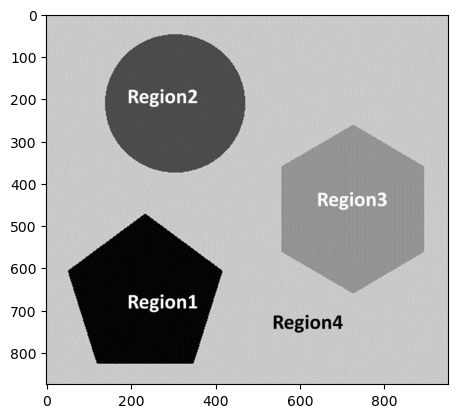

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
# testimage=img.imread('photoshop_created_image5.png')
testimage=img.imread('NewImg2_sir.jpg')
testimage2=img.imread('brain_mri.jpeg')
plt.imshow(testimage,cmap='gray')
plt.show()

In [4]:
# to convert to grayscale
import cv2
img_gray = cv2.cvtColor(testimage2, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(testimage.shape)

(875, 950)


In [6]:
print(np.max(img_gray))

253


In [7]:
def XIFS(image,beta):
    u=image #(x,y)
    nu=np.divide((1-u),(1+beta*u)) #(x,y)
    hes=1-nu-u #(x,y)
    xifs=np.array([u,nu,hes],dtype=np.float32) #(3,x,y)
    xifs=np.transpose(xifs, (1, 2, 0)) #(x,y,3)
    return xifs

In [8]:
print(XIFS(img_gray*255,1.2).shape)

(914, 662, 3)


In [9]:
data=XIFS(testimage,20)
# data=testimage
m=2
epochs=100
ws=3
# alpha=0.5
c=4
U,Cen,OBJ,Dist_Mat=IFCM(data,ws,m,c,epochs)

Itteration  0 Differnce 375969.96986482956
Itteration  1 Differnce 1591.5839982805694
Itteration  2 Differnce 3118.723911503832
Itteration  3 Differnce 6116.873427612448
Itteration  4 Differnce 12068.36119966269
Itteration  5 Differnce 24017.771789381153
Itteration  6 Differnce 48817.300449642586
Itteration  7 Differnce 100197.238419576
Itteration  8 Differnce 199575.91201209603
Itteration  9 Differnce 326870.93013872416
Itteration  10 Differnce 253218.47285396367
Itteration  11 Differnce 110431.70378613824
Itteration  12 Differnce 64679.81316959423
Itteration  13 Differnce 27549.35505304893
Itteration  14 Differnce 11164.368908215532
Itteration  15 Differnce 5008.133353053889
Itteration  16 Differnce 4887.506762284227
Itteration  17 Differnce 7955.573134004252
Itteration  18 Differnce 15833.977079365066
Itteration  19 Differnce 31975.79483462159
Itteration  20 Differnce 59546.205843560834
Itteration  21 Differnce 59708.407263708665
Itteration  22 Differnce 29826.201753833015
Itteratio

In [10]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)

(875, 950, 4)


In [11]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCM')

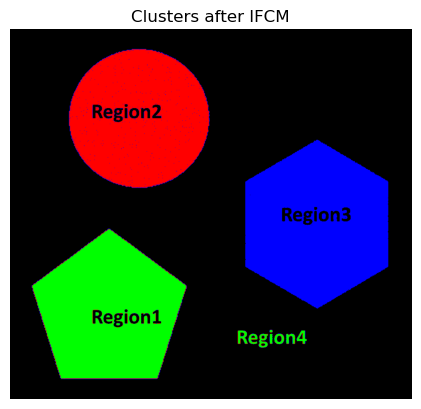

In [12]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCM')

In [13]:
print(seg1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[]

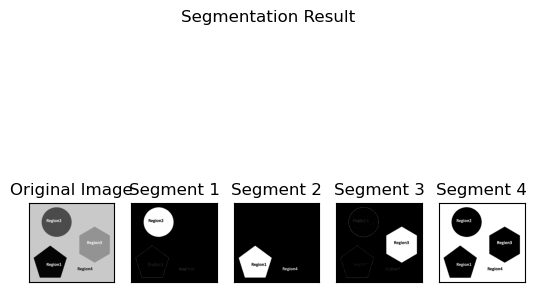

In [14]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

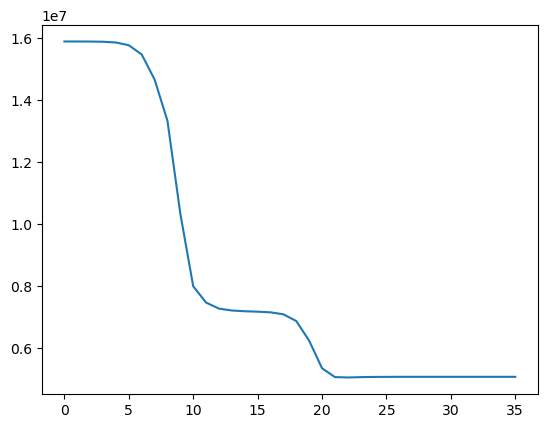

In [15]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)

In [16]:
data=XIFS(img_gray,20)
# data=testimage
m=2
epochs=100
ws=3
# alpha=0.5
c=4
U,Cen,OBJ,Dist_Mat=IFCM(data,ws,m,c,epochs)

Itteration  0 Differnce 273700.12183150626
Itteration  1 Differnce 1072.0049305511839
Itteration  2 Differnce 2049.3134674721305
Itteration  3 Differnce 3990.8941703273827
Itteration  4 Differnce 7787.565317534219
Itteration  5 Differnce 14461.438721643954
Itteration  6 Differnce 27896.539428950353
Itteration  7 Differnce 49910.170189243676
Itteration  8 Differnce 75593.14619896695
Itteration  9 Differnce 108485.49253439906
Itteration  10 Differnce 130533.8365032501
Itteration  11 Differnce 155114.48472771153
Itteration  12 Differnce 177020.2350367444
Itteration  13 Differnce 179188.63481070515
Itteration  14 Differnce 117026.10981072887
Itteration  15 Differnce 62493.00007010969
Itteration  16 Differnce 35147.82714703418
Itteration  17 Differnce 18100.672891898903
Itteration  18 Differnce 10770.766003011915
Itteration  19 Differnce 6634.818038716428
Itteration  20 Differnce 4256.032200447428
Itteration  21 Differnce 2834.2123732486807
Itteration  22 Differnce 1929.9894675246123
Ittera

In [17]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

(914, 662, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCM')

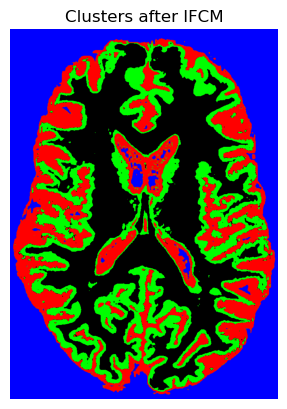

In [18]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCM')

[]

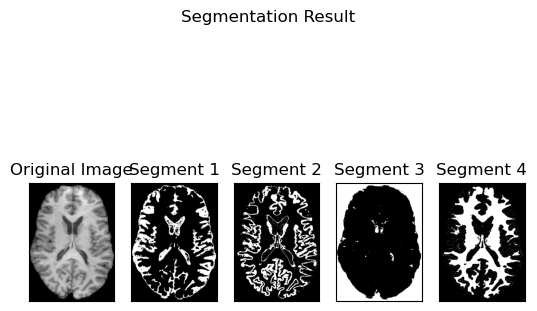

In [19]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage2,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

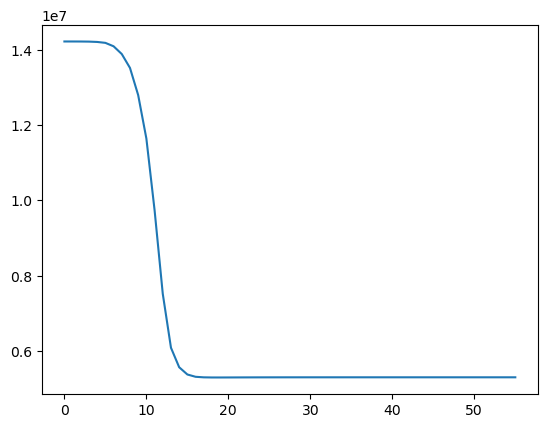

In [20]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)